In [2]:
import pandas as pd
import os
import seaborn as sns


dir=r"http://stat.columbia.edu/~rachel/datasets/"
df=pd.DataFrame()
for x in range(1,8):
  name=dir+'nyt'+str(x)+'.csv'
  tmp=pd.read_csv (name)
  tmp['day']=x
  df=df.append(tmp)
  print("nyt"+str(x)+".csv is added to the data frame")
 


nyt1.csv is added to the data frame
nyt2.csv is added to the data frame
nyt3.csv is added to the data frame
nyt4.csv is added to the data frame
nyt5.csv is added to the data frame
nyt6.csv is added to the data frame
nyt7.csv is added to the data frame


In [3]:
print(  df.describe()  )


                Age        Gender   Impressions        Clicks     Signed_In  \
count  3.378934e+06  3.378934e+06  3.378934e+06  3.378934e+06  3.378934e+06   
mean   2.947162e+01  3.637851e-01  4.999779e+00  9.244158e-02  7.000877e-01   
std    2.363669e+01  4.810879e-01  2.235961e+00  3.099647e-01  4.582194e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00   
50%    3.100000e+01  0.000000e+00  5.000000e+00  0.000000e+00  1.000000e+00   
75%    4.800000e+01  1.000000e+00  6.000000e+00  0.000000e+00  1.000000e+00   
max    1.120000e+02  1.000000e+00  2.000000e+01  6.000000e+00  1.000000e+00   

                day  
count  3.378934e+06  
mean   4.160188e+00  
std    2.019471e+00  
min    1.000000e+00  
25%    2.000000e+00  
50%    4.000000e+00  
75%    6.000000e+00  
max    7.000000e+00  


The count of each columnn are same, so don't need to deal with missing value.

In [4]:
print(df.head())

   Age  Gender  Impressions  Clicks  Signed_In  day
0   36       0            3       0          1    1
1   73       1            3       0          1    1
2   30       0            3       0          1    1
3   49       1            3       0          1    1
4   47       1           11       0          1    1


Create a new variable, age_group, that categorizes users as “<18”, ”18-24”, ”25-34”, ”35-44”, ”45-54”, “55-64” and “65+”.

In [5]:
ages = [float('-inf'),18,25,35,45,55,65,float('inf')]
age_labels =["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df['Age_Group'] = pd.cut(df['Age'],bins=ages, labels=age_labels,right=True)



In [6]:
print(df.head(40))

    Age  Gender  Impressions  Clicks  Signed_In  day Age_Group
0    36       0            3       0          1    1     35-44
1    73       1            3       0          1    1       65+
2    30       0            3       0          1    1     25-34
3    49       1            3       0          1    1     45-54
4    47       1           11       0          1    1     45-54
5    47       0           11       1          1    1     45-54
6     0       0            7       1          0    1       <18
7    46       0            5       0          1    1     45-54
8    16       0            3       0          1    1       <18
9    52       0            4       0          1    1     45-54
10    0       0            8       1          0    1       <18
11   21       0            3       0          1    1     18-24
12    0       0            4       0          0    1       <18
13   57       0            6       0          1    1     55-64
14   31       0            5       0          1    1   

Plot the distributions of number impressions and click-through-rate (CTR=# clicks/# impressions), for these 6 age categories.

In [7]:
day2=df[df['day']==2]
day2['CTS']=day2['Clicks']/day2['Impressions']
print(day2)


        Age  Gender  Impressions  Clicks  Signed_In  day Age_Group       CTS
0        48       1            3       0          1    2     45-54  0.000000
1         0       0            9       1          0    2       <18  0.111111
2        15       1            4       0          1    2       <18  0.000000
3         0       0            5       0          0    2       <18  0.000000
4         0       0            7       1          0    2       <18  0.142857
...     ...     ...          ...     ...        ...  ...       ...       ...
449930   21       1            5       0          1    2     18-24  0.000000
449931   37       1            9       0          1    2     35-44  0.000000
449932   52       1            2       0          1    2     45-54  0.000000
449933   22       1            0       0          1    2     18-24       NaN
449934   66       0            6       0          1    2       65+  0.000000

[449935 rows x 8 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


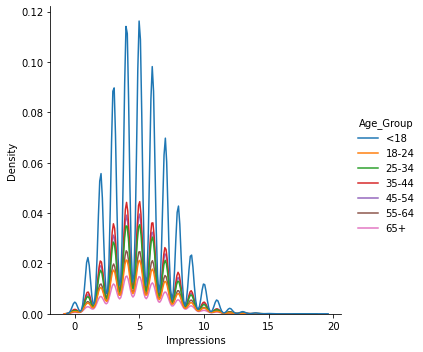

In [8]:
# print(df['Impressions'])
sns.displot(data=day2,x=day2['Impressions'] ,kind="kde",hue='Age_Group')


We can see from the plot that age group <18 has the most impressios.

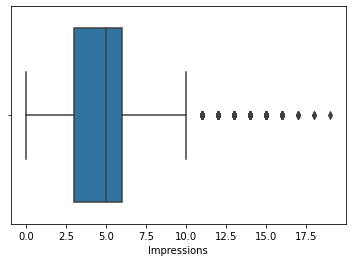

In [9]:

sns.boxplot(x=day2['Impressions'] )

(Expalin this)

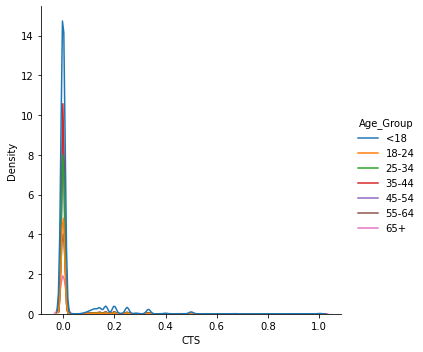

In [10]:
sns.displot(data=day2,x=day2['CTS'] ,kind="kde",hue='Age_Group')

For CTS, the majority of them are low.

In [13]:
df2=df[df['day']==2].groupby(['Age_Group']).sum().reset_index()

df2['CTS']=df2['Clicks']/df2['Impressions']
print(df2)

  Age_Group      Age  Gender  Impressions  Clicks  Signed_In     day       CTS
0       <18   306518   12470       768874   21700      19135  307414  0.028223
1     18-24   816015   20443       188483    1963      37777   75554  0.010415
2     25-34  1731558   31130       287635    2886      57485  114970  0.010034
3     35-44  2750127   37428       342577    3499      68672  137344  0.010214
4     45-54  3107982   33811       310748    3340      62190  124380  0.010748
5     55-64  2561279   23210       214489    4345      42761   85522  0.020257
6       65+  2003432    9964       136680    4019      27343   54686  0.029404


[Text(0.5, 1.0, 'Impression count by age group')]

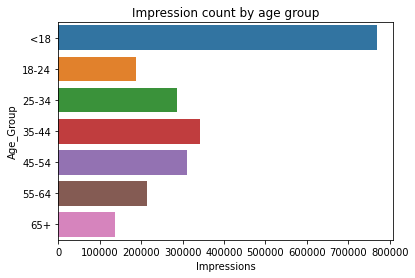

In [14]:
sns.barplot(data=df2, x="Impressions",y="Age_Group").set(title="Impression count by age group")

It seems like for impressions by age group, <18 has the most impression.


[Text(0.5, 1.0, 'CTR by age group')]

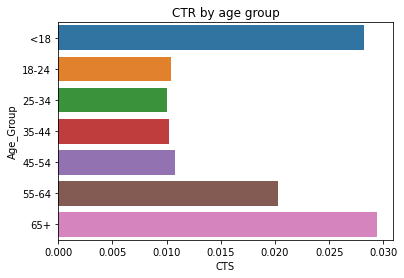

In [15]:
sns.barplot(data=df2, x="CTS",y="Age_Group").set(title="CTR by age group")

If we consider CTS, **<18** and **65+** are the most.
I knowtice from the data that the age group 65+, even though they view the web less, their CTS rate is higer than others.

*Define a new variable to segment or categorize users based on their click behavior*

In [16]:
clicks_gender1=df[df['Gender']==1].groupby('Age_Group').sum()['Clicks']
clicks_gender0=df[df['Gender']==0].groupby('Age_Group').sum()['Clicks']
print(clicks_gender0)
print(clicks_gender1)

Age_Group
<18      150488
18-24      6707
25-34     10293
35-44     12423
45-54     11417
55-64     15557
65+       19767
Name: Clicks, dtype: int64
Age_Group
<18      12465
18-24     7369
25-34    11249
35-44    13773
45-54    12822
55-64    17116
65+      10908
Name: Clicks, dtype: int64


clicks_gender1
  is Female for each age group


clicks_gender0
  is Male for each age group





Text(0.5, 1.0, 'Clicking amount for each age group')

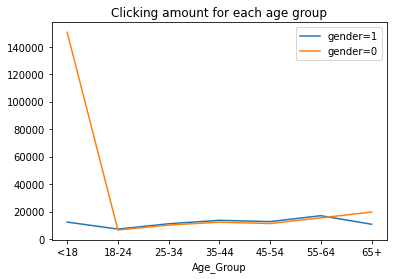

In [17]:
import matplotlib.pyplot as plt
clicks_gender1.plot(legend=age_labels)
clicks_gender0.plot(legend=age_labels)
plt.legend( ['gender=1','gender=0'] )
plt.title('Clicking amount for each age group')




Except for the age group of youger than 18, theere are not a lot of different on clicking amount between males and females.

Explore the data and make visual and quantitative comparisons across user segments/ demographics (<18 year old male vs < 18 year old
females or logged-in vs not, for example). 

In [18]:
sign_in=df[ df['Signed_In']==1]

by_age=df.groupby(  ['Age_Group','Signed_In'] )['Clicks'].sum().reset_index()
print(by_age.head(100))


   Age_Group  Signed_In  Clicks
0        <18          0  143902
1        <18          1   19051
2      18-24          0       0
3      18-24          1   14076
4      25-34          0       0
5      25-34          1   21542
6      35-44          0       0
7      35-44          1   26196
8      45-54          0       0
9      45-54          1   24239
10     55-64          0       0
11     55-64          1   32673
12       65+          0       0
13       65+          1   30675


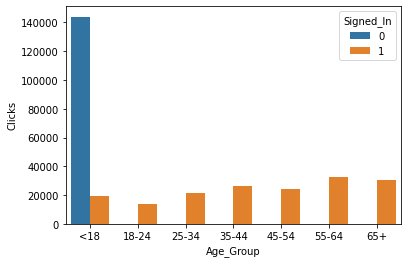

In [19]:

sns.barplot(data=by_age,x='Age_Group',  y='Clicks',hue='Signed_In')


We can see from the chart that only for age group <18, there are significant difference betwen signed in and did not signed in.

In [20]:
df[ ( (df.Signed_In==0) & (df.Age_Group=='<18') ) ]

,Age,Gender,Impressions,Clicks,Signed_In,day,Age_Group
6,0,0,7,1,0,1,<18
10,0,0,8,1,0,1,<18
12,0,0,4,0,0,1,<18
15,0,0,6,0,0,1,<18
19,0,0,5,0,0,1,<18
...,...,...,...,...,...,...,...
452475,0,0,3,0,0,7,<18
452477,0,0,8,0,0,7,<18
452482,0,0,3,0,0,7,<18
452484,0,0,6,0,0,7,<18


Create metrics/measurements/statistics that summarize the data. Examples of potential metrics include CTR, quantiles, mean, median, variance, max, and these can be calculated across the various user segments. Be selective. Think about what will be important to track over time; what will compress the data, but still capture user behavior. Now extend your analysis across days (one week is sufficient). Visualize metrics and distributions over time. Your plot should emphasize what actually changes over days.
d. Describe and interpret any patterns you find. [Include in your writeup]

Describe and interpret any patterns you find. [Include in your writeup]


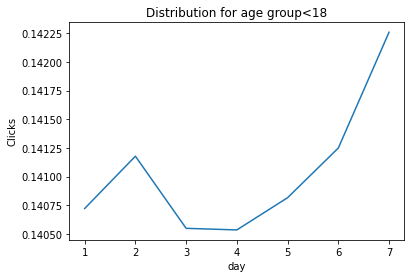

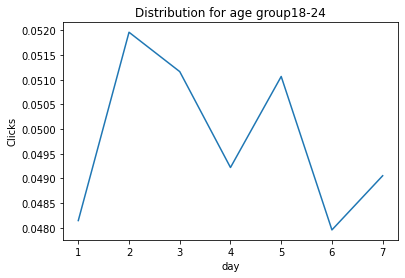

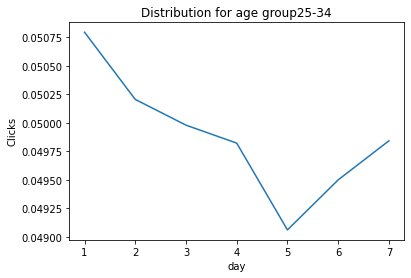

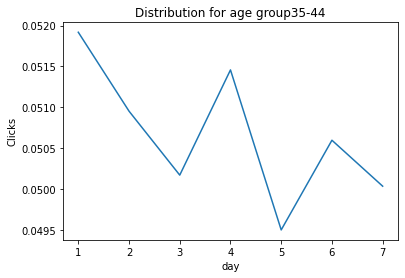

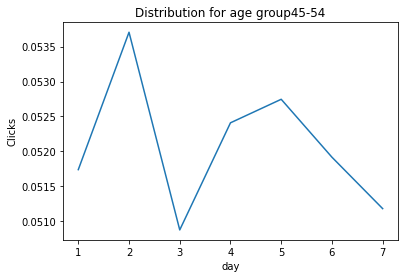

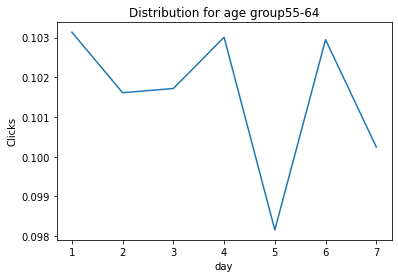

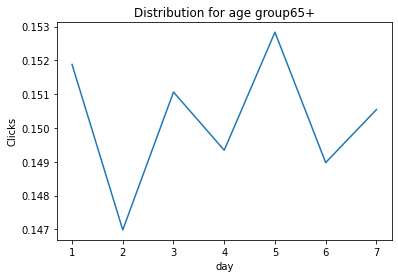

In [22]:
import matplotlib.pyplot as plt
for x in age_labels:  
  tmp=df[df['Age_Group']==x].groupby('day').mean().reset_index()

  sns.lineplot(data=tmp, x="day", y="Clicks")
  plt.title('Distribution for age group'+x)
  plt.show()


We can find from the plot, diffent age group varies their clicking behavior on different days in a week.
We can also find that,when signed in =0, there are 1013384 records that age=0.

Part2
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [23]:
! pip install -q kaggle


In [24]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevinchoooou","key":"83cf2a5d0438ccf487ae15cf62fe261f"}'}

In [25]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [26]:
!kaggle datasets download -d ruchi798/data-science-job-salaries

  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 5.00MB/s]


In [27]:
!unzip data-science-job-salaries.zip

Archive:  data-science-job-salaries.zip
  inflating: ds_salaries.csv         


In [42]:
df2=pd.read_csv( 'ds_salaries.csv' )
df2.rename( columns={'Unnamed: 0':'ID'}, inplace=True )


In [46]:
print(  df2.describe()  )
print(  df2.head())

               ID    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000
   ID  work_year experience_level employment_type                   job_title  \
0   0       2020               MI              FT              Data Scientist   
1   1       2020               SE              FT  Machine Learning Scientist   
2   2       2020               SE              FT           Big Data Engineer   
3   3     

In [47]:
print(df2['work_year'].max())
print(df2['work_year'].min())

2022
2020


The data is gatherd from 2020-2022.

In [151]:
by_country=df2.groupby('employee_residence').sum().sort_values(by="ID",ascending=False).reset_index()
print(by_country.head())

  employee_residence      ID  work_year    salary  salary_in_usd  remote_ratio
0                 US  114966     671167  49735211       49532447         25650
1                 GB   13478      88950   2732856        3581739          2000
2                 CA   10527      58627   3266200        2815474          2200
3                 IN    6264      60631  56104997        1119670          1900
4                 DE    4708      50522   1841719        2138814          1400


In [152]:
by_country.loc[by_country['ID']<2000, 'employee_residence'] ='Others'


In [153]:
by_country=by_country.groupby('employee_residence').sum().sort_values(by="ID",ascending=False).reset_index()
print(by_country.head(10))

  employee_residence      ID  work_year    salary  salary_in_usd  remote_ratio
0                 US  114966     671167  49735211       49532447         25650
1             Others   22854     204123  80590675        6302497          6500
2                 GB   13478      88950   2732856        3581739          2000
3                 CA   10527      58627   3266200        2815474          2200
4                 IN    6264      60631  56104997        1119670          1900
5                 DE    4708      50522   1841719        2138814          1400
6                 GR    4118      26280    656000         732306          1050
7                 ES    3790      30318    795160         863901          1350
8                 FR    3216      36375    945220        1077959          1000


([<matplotlib.patches.Wedge at 0x7f636fca3090>,
 [Text(-0.4212187514916745, 1.0161568596391972, 'US'),
  Text(-0.422780110457417, -1.015508236402647, 'Others'),
  Text(0.24659163819974653, -1.0720039943815347, 'GB'),
  Text(0.6534955391930971, -0.8848409915090527, 'CA'),
  Text(0.8771175694803474, -0.6638258576681751, 'IN'),
  Text(0.9854423916402267, -0.48877734476793233, 'DE'),
  Text(1.0476735606959793, -0.33523142785038545, 'GR'),
  Text(1.0832749715563823, -0.19108986367549485, 'ES'),
  Text(1.0983407214702319, -0.06039585714476645, 'FR')])

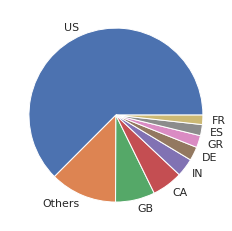

In [154]:
plt.pie(data=by_country,labels="employee_residence",x="ID")

We can see most of the data science jobs are in the US.

In [155]:
newest=df2[ df2['work_year']==2022]


Get 2022 data.

In [45]:
print(newest.describe())


               ID  work_year        salary  salary_in_usd  remote_ratio
count  318.000000      318.0  3.180000e+02     318.000000    318.000000
mean   447.500000     2022.0  1.588278e+05  124522.006289     73.584906
std     91.942917        0.0  3.712070e+05   58183.647585     43.072575
min    289.000000     2022.0  1.000000e+04   10000.000000      0.000000
25%    368.250000     2022.0  8.041650e+04   81666.000000     50.000000
50%    447.500000     2022.0  1.230000e+05  120000.000000    100.000000
75%    526.750000     2022.0  1.600600e+05  160000.000000    100.000000
max    606.000000     2022.0  6.000000e+06  405000.000000    100.000000


There is no missing value

In [30]:

print(newest.head())


      ID  work_year experience_level employment_type       job_title  salary  \
289  289       2022               SE              FT   Data Engineer  135000   
290  290       2022               SE              FT    Data Analyst  155000   
291  291       2022               SE              FT    Data Analyst  120600   
292  292       2022               MI              FT  Data Scientist  130000   
293  293       2022               MI              FT  Data Scientist   90000   

    salary_currency  salary_in_usd employee_residence  remote_ratio  \
289             USD         135000                 US           100   
290             USD         155000                 US           100   
291             USD         120600                 US           100   
292             USD         130000                 US             0   
293             USD          90000                 US             0   

    company_location company_size  
289               US            M  
290               US

We can see from the DataFrame, there 11 columns which represents different attributes for Data Science job salaries.
I wish to analyiss the newest data(2022) can try to find top 5 job titles that earn the most after coverted back to USD. 

In [156]:
print(  pd.unique  (newest['job_title'])  )


['Data Engineer' 'Data Analyst' 'Data Scientist' 'Head of Data Science'
 'Analytics Engineer' 'Data Science Manager' 'Data Architect'
 'Machine Learning Engineer' 'ETL Developer' 'Lead Data Engineer'
 'Head of Machine Learning' 'AI Scientist' 'Data Analytics Manager'
 'Data Science Engineer' 'Machine Learning Scientist' 'ML Engineer'
 'Machine Learning Developer' 'Director of Data Science'
 'Computer Vision Engineer' 'NLP Engineer'
 'Lead Machine Learning Engineer' 'Business Data Analyst'
 'Machine Learning Infrastructure Engineer' 'Financial Data Analyst'
 'Principal Data Scientist' 'Research Scientist'
 'Applied Machine Learning Scientist' 'Head of Data'
 'Principal Data Analyst' 'Applied Data Scientist'
 'Computer Vision Software Engineer' 'Data Analytics Engineer'
 'Data Analytics Lead']


In [32]:
top_5=newest.groupby(['job_title'])['salary_in_usd'].count().nlargest(5).reset_index()

top_5_jobs_list=list(top_5['job_title'])  

top_5_jobs=newest[newest['job_title'].isin(top_5_jobs_list)]
print(top_5_jobs.head() ) 

      ID  work_year experience_level employment_type       job_title  salary  \
289  289       2022               SE              FT   Data Engineer  135000   
290  290       2022               SE              FT    Data Analyst  155000   
291  291       2022               SE              FT    Data Analyst  120600   
292  292       2022               MI              FT  Data Scientist  130000   
293  293       2022               MI              FT  Data Scientist   90000   

    salary_currency  salary_in_usd employee_residence  remote_ratio  \
289             USD         135000                 US           100   
290             USD         155000                 US           100   
291             USD         120600                 US           100   
292             USD         130000                 US             0   
293             USD          90000                 US             0   

    company_location company_size  
289               US            M  
290               US

Get data that their job title is in the top five most popular ones.

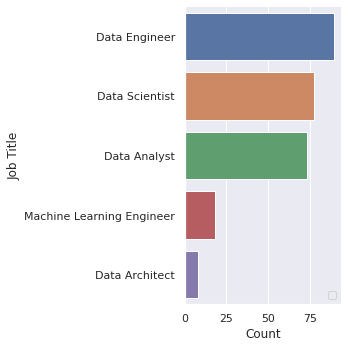

In [33]:
import seaborn as sns
import  matplotlib.pyplot as plt
sns.set(font_scale=1)
sns.catplot(data=top_5,y='job_title',x='salary_in_usd',kind="bar")
plt.ylabel("Job Title")
plt.xlabel('Count')
plt.legend(fontsize=10)

In [34]:
top_5_by_sal= top_5_jobs.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
print(top_5_by_sal)

                   job_title  salary_in_usd
0             Data Architect  182076.625000
1             Data Scientist  136172.090909
2  Machine Learning Engineer  129451.944444
3              Data Engineer  126375.696629
4               Data Analyst  100550.739726


Text(0.5, 8.95999999999998, 'Salary In USD')

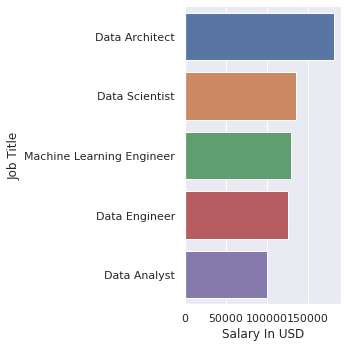

In [195]:
import seaborn as sns
import  matplotlib.pyplot as plt
ax=sns.catplot(data=top_5_by_sal,y='job_title',x='salary_in_usd',kind="bar")
plt.ylabel("Job Title")
plt.xlabel('Salary In USD')



In [36]:
print(newest.head())

      ID  work_year experience_level employment_type       job_title  salary  \
289  289       2022               SE              FT   Data Engineer  135000   
290  290       2022               SE              FT    Data Analyst  155000   
291  291       2022               SE              FT    Data Analyst  120600   
292  292       2022               MI              FT  Data Scientist  130000   
293  293       2022               MI              FT  Data Scientist   90000   

    salary_currency  salary_in_usd employee_residence  remote_ratio  \
289             USD         135000                 US           100   
290             USD         155000                 US           100   
291             USD         120600                 US           100   
292             USD         130000                 US             0   
293             USD          90000                 US             0   

    company_location company_size  
289               US            M  
290               US

In [37]:
by_remote= newest.groupby('job_title')['remote_ratio'].mean().sort_values(ascending=False).reset_index()
by_remote=by_remote[ by_remote ['remote_ratio']>=75]

But if you are looking for jobs that allow you to work remotely, these are the top choices.

Text(-170.41500000000002, 0.5, 'Job Title')

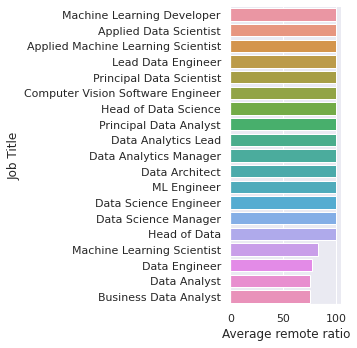

In [38]:
import seaborn as sns
import  matplotlib.pyplot as plt
sns.catplot(data=by_remote,y='job_title',x='remote_ratio',kind="bar")
plt.xlabel("Average remote ratio")
plt.ylabel('Job Title')


In [39]:
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [192]:
by_year=df2.groupby('work_year').mean().reset_index()
print(by_year.describe(),"\n\n")
print(by_year.head())

       work_year          ID         salary  salary_in_usd  remote_ratio
count        3.0    3.000000       3.000000       3.000000      3.000000
mean      2021.0  221.000000  362630.469790  106729.599639     69.097554
std          1.0  209.037676  194678.057221   15540.569555      4.500846
min       2020.0   35.500000  158827.786164   95813.000000     64.583333
25%       2020.5  107.750000  270607.011137   97833.396313     66.853879
50%       2021.0  180.000000  382386.236111   99853.792627     69.124424
75%       2021.5  313.750000  464531.811604  112187.899458     71.354665
max       2022.0  447.500000  546677.387097  124522.006289     73.584906 


   work_year     ID         salary  salary_in_usd  remote_ratio
0       2020   35.5  382386.236111   95813.000000     64.583333
1       2021  180.0  546677.387097   99853.792627     69.124424
2       2022  447.5  158827.786164  124522.006289     73.584906


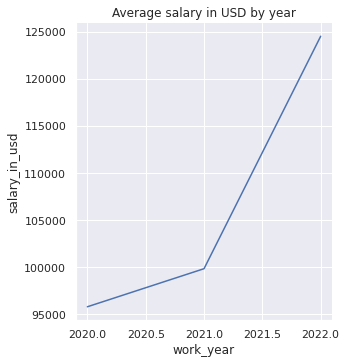

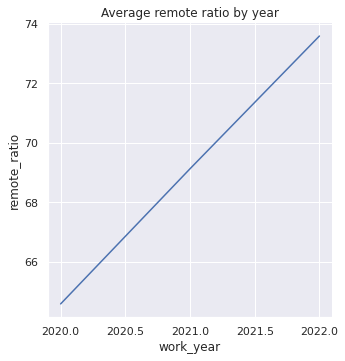

In [188]:
sns.relplot(data=by_year,x='work_year',y='salary_in_usd',kind="line").set(title="Average salary in USD by year")
sns.relplot(data=by_year,x='work_year',y='remote_ratio',kind="line").set(title="Average remote ratio by year")

We can also see from the chart in the front, the average salary and remote ration is increasing.